In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

# Random Forests

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"]).astype(np.int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

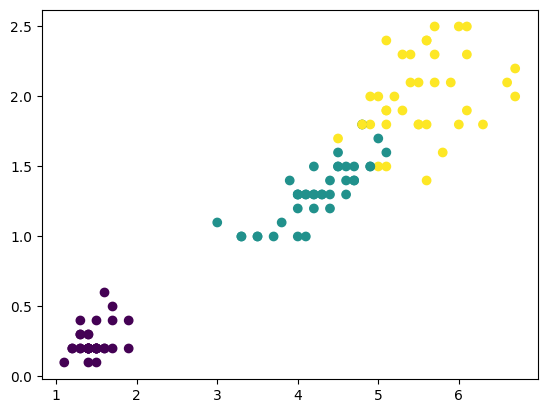

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

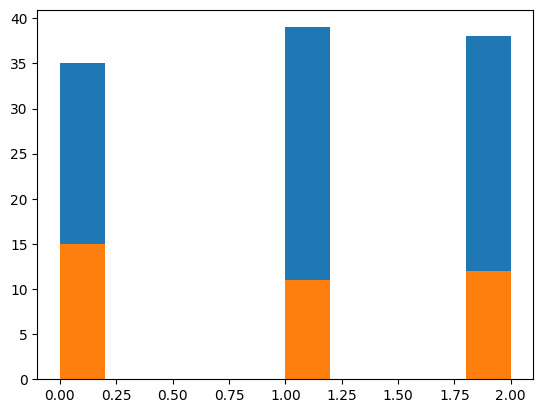

In [ ]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

* RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

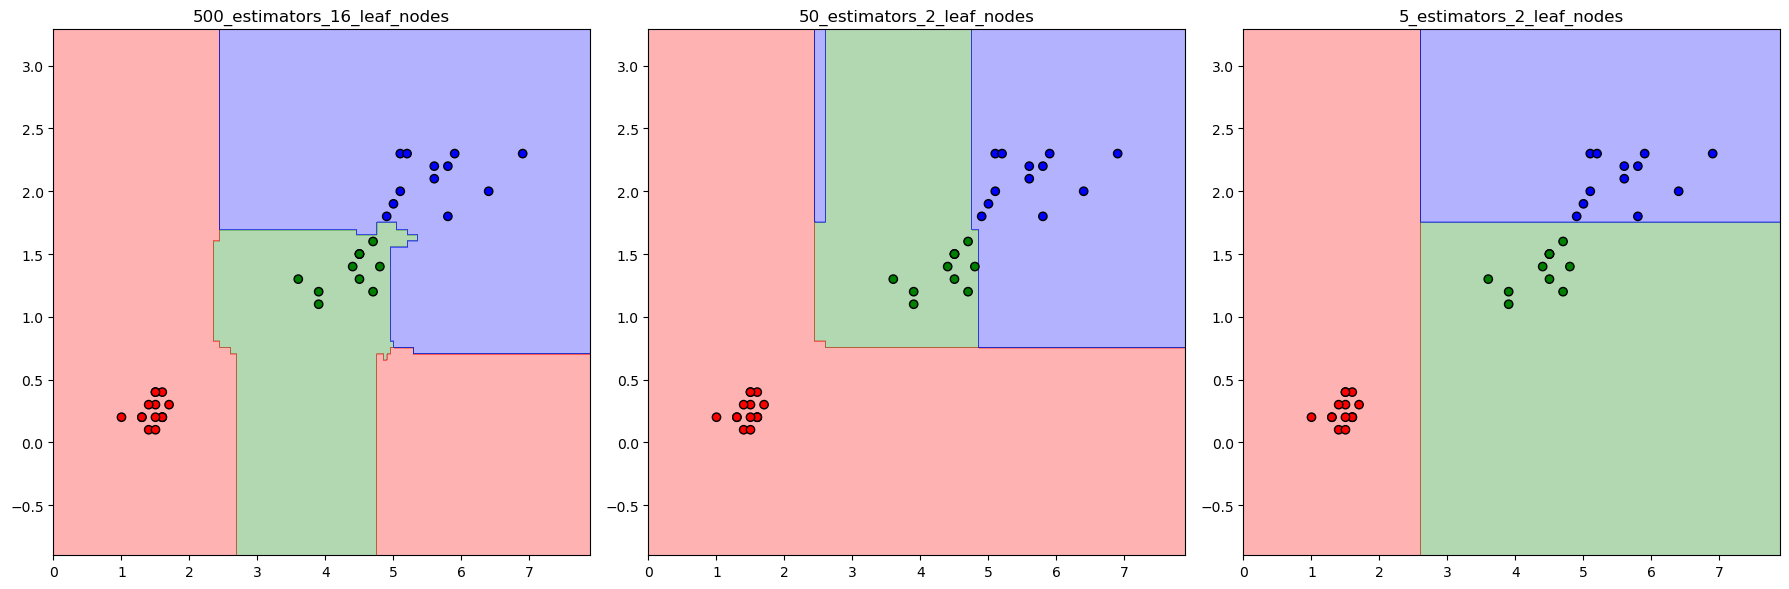

{'500_estimators_16_leaf_nodes': 1.0,
 '50_estimators_2_leaf_nodes': 1.0,
 '5_estimators_2_leaf_nodes': 1.0}

In [5]:
# Ensure necessary libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] 
y = (iris["target"]).astype(np.int32)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

classifiers = {
    "500_estimators_16_leaf_nodes": RandomForestClassifier(
        n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42
    ),
    "50_estimators_2_leaf_nodes": RandomForestClassifier(
        n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42
    ),
    "5_estimators_2_leaf_nodes": RandomForestClassifier(
        n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42
    ),
}



def plot_decision_boundary(X, y, clf, ax, title):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

   
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(("red", "green", "blue")))
    scatter = ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        edgecolor="k",
        cmap=ListedColormap(("red", "green", "blue")),
    )
    ax.set_title(title)
    return scatter



fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, clf) in zip(axes, classifiers.items()):
    clf.fit(X_train, y_train)
    scatter = plot_decision_boundary(X_test, y_test, clf, ax, name)

plt.tight_layout()
plt.show()


performance = {}
for name, clf in classifiers.items():
    accuracy = clf.score(X_test, y_test)
    performance[name] = accuracy

performance